In [1]:
#importing libraries
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import numpy as np
#manager dataframe
df_manager = pd.read_csv('C:/ML/python/data/manager_survey_data.csv')
df_manager.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   EmployeeID         4410 non-null   int64
 1   JobInvolvement     4410 non-null   int64
 2   PerformanceRating  4410 non-null   int64
dtypes: int64(3)
memory usage: 103.5 KB


In [2]:
df_manager.dtypes

EmployeeID           int64
JobInvolvement       int64
PerformanceRating    int64
dtype: object

In [3]:
df_manager.isna().sum()

EmployeeID           0
JobInvolvement       0
PerformanceRating    0
dtype: int64

In [4]:
df_manager.duplicated().sum()

0

Text(0.5, 1.0, 'Level of involvement')

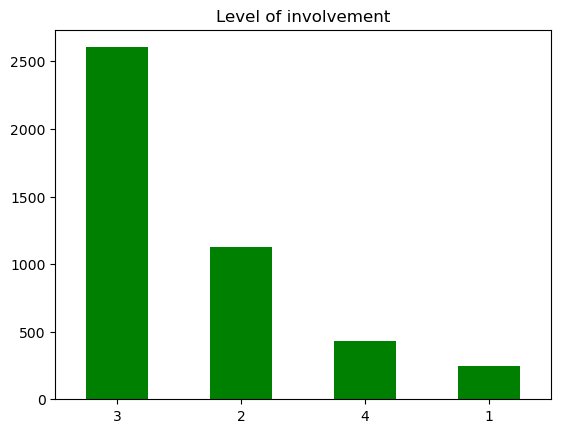

In [5]:
axs = df_manager["JobInvolvement"].value_counts().plot(kind='bar',rot=0,color='green')
axs.set_title('Level of involvement')

<Axes: ylabel='PerformanceRating'>

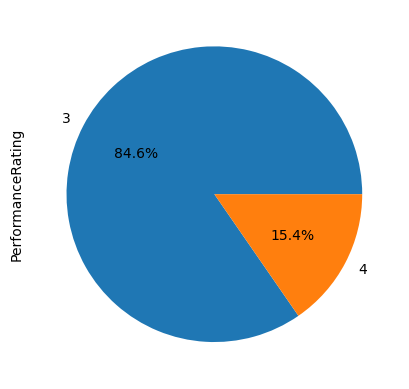

In [6]:
df_manager['PerformanceRating'].value_counts().plot(kind='pie',autopct = '%1.1f%%')

In [7]:
df_manager.drop('EmployeeID',axis=1,inplace=True)

In [8]:
#importing general dataset
general_df = pd.read_csv("C:/ML/python/data/general_data.csv",delimiter=',')
general_df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeID                  0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [9]:
general_df['NumCompaniesWorked'] = general_df['NumCompaniesWorked'].fillna(method='ffill')
general_df.duplicated().sum()

0

In [10]:
general_df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeID                   int64
Gender                      object
JobLevel                     int64
JobRole                     object
MaritalStatus               object
MonthlyIncome                int64
NumCompaniesWorked         float64
Over18                      object
PercentSalaryHike            int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears          float64
TrainingTimesLastYear        int64
YearsAtCompany               int64
YearsSinceLastPromotion      int64
YearsWithCurrManager         int64
dtype: object

<Axes: >

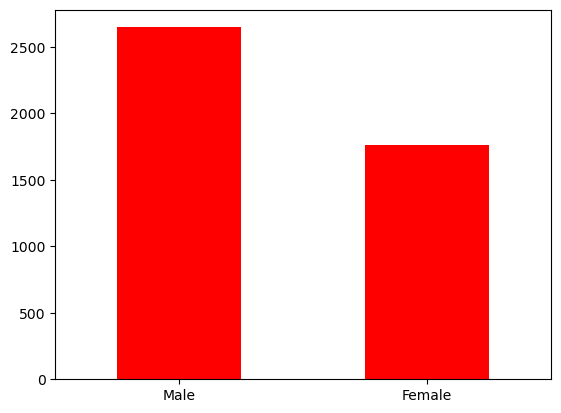

In [11]:
general_df['Gender'].value_counts().plot(kind='bar',rot=0,color='red')

<Axes: ylabel='Department'>

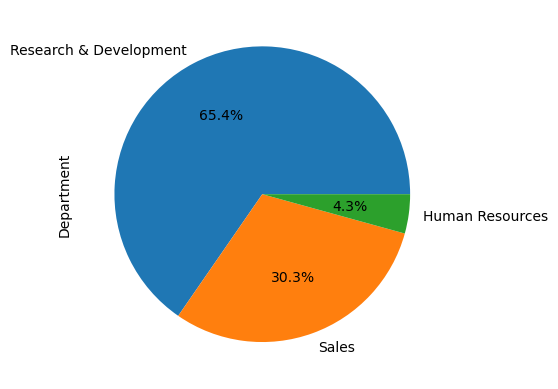

In [12]:
general_df['Department'].value_counts().plot(kind='pie',autopct = '%1.1f%%')

In [13]:
#importing employee dataframe
employee_df = pd.read_csv('C:/ML/python/data/general_data.csv',delimiter=',')
employee_df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeID                   int64
Gender                      object
JobLevel                     int64
JobRole                     object
MaritalStatus               object
MonthlyIncome                int64
NumCompaniesWorked         float64
Over18                      object
PercentSalaryHike            int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears          float64
TrainingTimesLastYear        int64
YearsAtCompany               int64
YearsSinceLastPromotion      int64
YearsWithCurrManager         int64
dtype: object

In [14]:
employee_df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeID                  0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

<Axes: ylabel='Gender'>

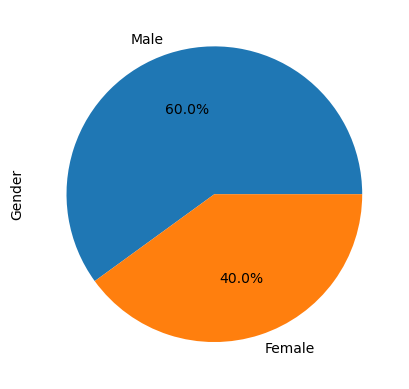

In [15]:
employee_df['NumCompaniesWorked'] = employee_df['NumCompaniesWorked'].fillna(method='ffill')
employee_df['Gender'].value_counts().plot(kind='pie',autopct = '%1.1f%%')

<Axes: >

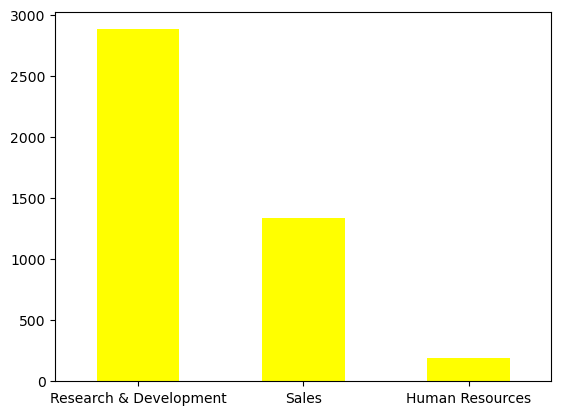

In [16]:
employee_df['Department'].value_counts().plot(kind='bar',rot=0,color='yellow')

In [17]:
employee_df.drop('EmployeeID',axis=1,inplace=True)

<Axes: ylabel='BusinessTravel'>

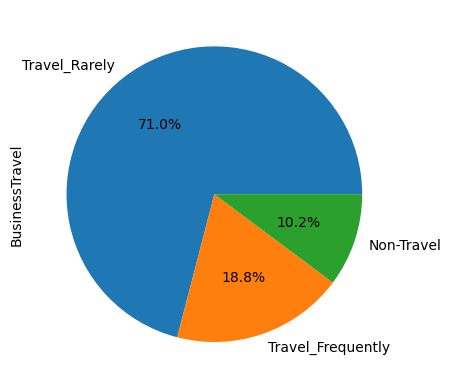

In [18]:

employee_df['BusinessTravel'].value_counts().plot(kind='pie',autopct = '%1.1f%%')

In [19]:
#general and employee dataframes combined

general_employee_combined = pd.concat([employee_df,general_df],axis=1)

general_employee_combined.isna().sum()
general_employee_combined.columns.duplicated().sum()



23

In [20]:
general_employee_combined.drop_duplicates(inplace=True)

In [21]:
employee_df.dtypes
employee_df.nunique()

Age                          43
Attrition                     2
BusinessTravel                3
Department                    3
DistanceFromHome             29
Education                     5
EducationField                6
EmployeeCount                 1
Gender                        2
JobLevel                      5
JobRole                       9
MaritalStatus                 3
MonthlyIncome              1349
NumCompaniesWorked           10
Over18                        1
PercentSalaryHike            15
StandardHours                 1
StockOptionLevel              4
TotalWorkingYears            40
TrainingTimesLastYear         7
YearsAtCompany               37
YearsSinceLastPromotion      16
YearsWithCurrManager         18
dtype: int64

In [22]:
#all three dataframes combined
all_combined = pd.concat([general_employee_combined,df_manager],axis=1)



df = all_combined.loc[:,~all_combined.columns.duplicated()].copy()

In [23]:
df.duplicated().sum()


0

In [24]:
df.columns.duplicated().sum()

0

In [25]:
df.isna().sum()

Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EmployeeCount              0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
Over18                     0
PercentSalaryHike          0
StandardHours              0
StockOptionLevel           0
TotalWorkingYears          9
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
EmployeeID                 0
JobInvolvement             0
PerformanceRating          0
dtype: int64

In [26]:
df.drop('EmployeeCount',axis=1,inplace=True)
df.dtypes
df.nunique()

Age                          43
Attrition                     2
BusinessTravel                3
Department                    3
DistanceFromHome             29
Education                     5
EducationField                6
Gender                        2
JobLevel                      5
JobRole                       9
MaritalStatus                 3
MonthlyIncome              1349
NumCompaniesWorked           10
Over18                        1
PercentSalaryHike            15
StandardHours                 1
StockOptionLevel              4
TotalWorkingYears            40
TrainingTimesLastYear         7
YearsAtCompany               37
YearsSinceLastPromotion      16
YearsWithCurrManager         18
EmployeeID                 4410
JobInvolvement                4
PerformanceRating             2
dtype: int64

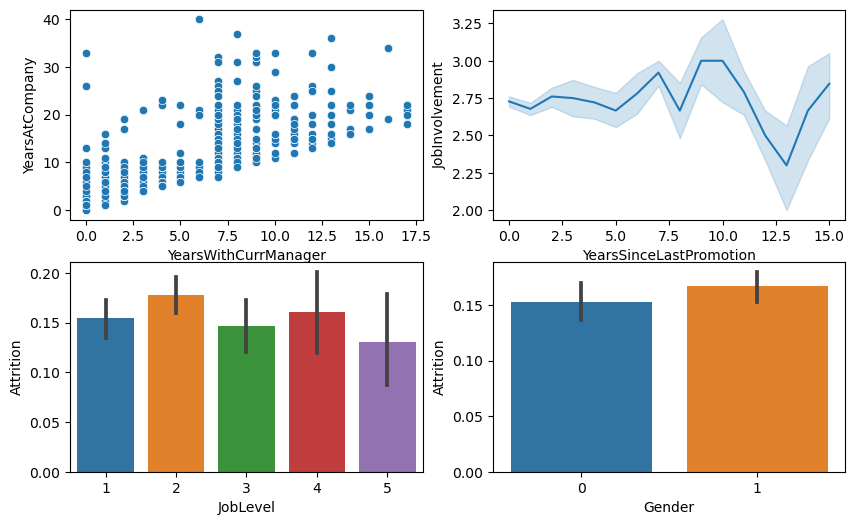

In [27]:
df['Attrition'] = [1 if X == 'Yes' else 0 for X in df['Attrition']]
df['Gender'] = [1 if X == 'Male' else 0 for X in df['Gender']]


import matplotlib.pyplot as plt
import seaborn as sns
def desc_stats(df):
    f,axs = plt.subplots(2,2,figsize=(10,6))
    sns.scatterplot(x='YearsWithCurrManager',y='YearsAtCompany',ax=axs[0,0],data=df)
    sns.lineplot(x='YearsSinceLastPromotion',y='JobInvolvement',data=df,ax=axs[0,1])

    
    sns.barplot(x='JobLevel',y='Attrition',data=df,ax=axs[1,0])
    sns.barplot(x='Gender',y='Attrition',ax=axs[1,1],data=df)
    
    plt.show()
    


desc_stats(df)    

In [28]:
df.isna().sum()
df.dropna(axis=1,inplace=True)
#train/test splot

X = df.drop('Attrition',axis=1)
y = df['Attrition']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.20,random_state=42)


In [29]:
#feature processing
from sklearn.preprocessing import OneHotEncoder,StandardScaler

ohe = OneHotEncoder()
sc = StandardScaler()



from sklearn.compose import make_column_transformer

ct = make_column_transformer(
    (ohe,X.select_dtypes(include='object').columns),
    (sc,X.select_dtypes(include=['float64','int64']).columns),remainder='passthrough')



ct.fit_transform(X)

array([[ 0.        ,  0.        ,  1.        , ..., -1.7316581 ,
         0.37967213, -0.42623002],
       [ 0.        ,  1.        ,  0.        , ..., -1.73087259,
        -1.02616674,  2.34615106],
       [ 0.        ,  1.        ,  0.        , ..., -1.73008708,
         0.37967213, -0.42623002],
       ...,
       [ 0.        ,  0.        ,  1.        , ...,  1.73008708,
         0.37967213,  2.34615106],
       [ 0.        ,  0.        ,  1.        , ...,  1.73087259,
        -1.02616674, -0.42623002],
       [ 0.        ,  0.        ,  1.        , ...,  1.7316581 ,
         1.78551099, -0.42623002]])

In [30]:
from sklearn.pipeline import make_pipeline

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()


from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,BaggingClassifier
RFC = RandomForestClassifier()
GBC = GradientBoostingClassifier()
BC = BaggingClassifier()

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)



from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve,confusion_matrix


def evaluate_(X_train,X_test,y_train,y_test,model):
    pipe = make_pipeline(ct,model).fit(X_train,y_train)
    pred = pipe.predict(X_test)
    pred_prob = pipe.predict_proba(X_test)[:,1]
    acc = accuracy_score(y_test,pred)
    roc = roc_auc_score(y_test,pred_prob)
    con = confusion_matrix(y_test,pred)
    print('confusion matrix: ',con)
    print(f'{model.__class__.__name__}, --Accuracy-- {acc*100:.2f}%; --ROC-- {roc*100:.2f}%')
    return pred,pred_prob



lr_pred,lr_pred_prob = evaluate_(X_train, X_test, y_train, y_test, lr)
GBC_pred,GBC_pred_prob = evaluate_(X_train, X_test, y_train, y_test, GBC)
BC_pred,BC_pred_prob = evaluate_(X_train, X_test, y_train, y_test, BC)
RFC_pred,RFC_pred_prob = evaluate_(X_train, X_test, y_train, y_test, RFC)
knn_pred,knn_pred_prob = evaluate_(X_train, X_test, y_train, y_test, knn)

confusion matrix:  [[722  19]
 [123  18]]
LogisticRegression, --Accuracy-- 83.90%; --ROC-- 71.99%
confusion matrix:  [[732   9]
 [ 96  45]]
GradientBoostingClassifier, --Accuracy-- 88.10%; --ROC-- 85.51%
confusion matrix:  [[741   0]
 [ 19 122]]
BaggingClassifier, --Accuracy-- 97.85%; --ROC-- 99.34%
confusion matrix:  [[741   0]
 [ 11 130]]
RandomForestClassifier, --Accuracy-- 98.75%; --ROC-- 99.92%
confusion matrix:  [[723  18]
 [ 94  47]]
KNeighborsClassifier, --Accuracy-- 87.30%; --ROC-- 88.42%


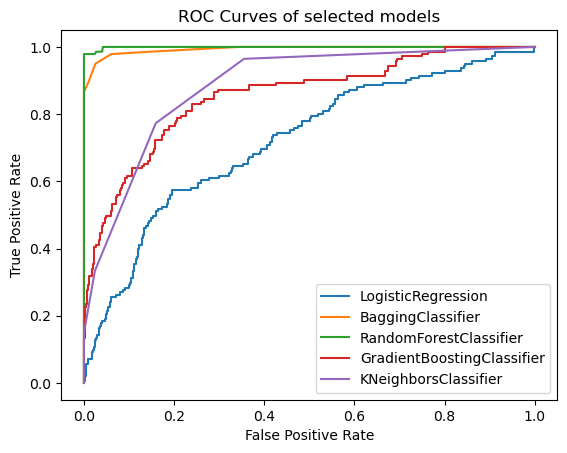

In [31]:
#ROC Curves for selected models
def ROC(y_test,y_pred_prob,model):
    fpr,tpr, _ = roc_curve(y_test,y_pred_prob)
    plt.plot(fpr,tpr,label=model.__class__.__name__)
    plt.title('ROC Curves of selected models')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    

ROC(y_test,lr_pred_prob,lr)
ROC(y_test,BC_pred_prob,BC)
ROC(y_test, RFC_pred_prob, RFC)
ROC(y_test,GBC_pred_prob,GBC)
ROC(y_test,knn_pred_prob,knn)
plt.legend()
plt.show()


In [32]:
#10-fold Cross validation

from sklearn.model_selection import cross_val_score,RandomizedSearchCV

def cv__scores(X,y,model):
    pipe = make_pipeline(ct,model).fit(X,y)
    cv_scores = cross_val_score(pipe, X,y,cv=10,scoring='roc_auc').max()
    print(f'{model.__class__.__name__}, --Results Using 10-fold Cross Validation-- {cv_scores*100}%')
    return cv_scores



lr_scores = cv__scores(X, y, lr)
BC_scores = cv__scores(X,y,BC)
GBC_scores = cv__scores(X,y,GBC)
RFC_scores = cv__scores(X,y,RFC)
knn_scores = cv__scores(X, y, knn)



LogisticRegression, --Results Using 10-fold Cross Validation-- 80.33498287019415%
BaggingClassifier, --Results Using 10-fold Cross Validation-- 100.0%
GradientBoostingClassifier, --Results Using 10-fold Cross Validation-- 92.02131709173963%
RandomForestClassifier, --Results Using 10-fold Cross Validation-- 100.0%
KNeighborsClassifier, --Results Using 10-fold Cross Validation-- 98.34387232761216%


In [33]:
#randomized grid search for logistic regression model


lr_params = {
    'logisticregression__penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 1000],
    'logisticregression__solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag', 'saga'],
    'logisticregression__max_iter': [10, 100, 500, 1000]
}
pipe_lr = make_pipeline(ct, lr).fit(X,y)
logreg_random = RandomizedSearchCV(pipe_lr,lr_params,cv=10,scoring='roc_auc', n_iter=10).fit(X,y)

In [34]:
#best paramters and estimators after grid search
best_params_logreg = logreg_random.best_params_
print('Best parameters for Logistic Regression model:', best_params_logreg)
best_score_logreg = logreg_random.best_score_
print('Best ROC AUC score through hyperparameter tuning:', best_score_logreg*100)



Best parameters for Logistic Regression model: {'logisticregression__solver': 'lbfgs', 'logisticregression__penalty': 'l2', 'logisticregression__max_iter': 100, 'logisticregression__C': 1000}
Best ROC AUC score through hyperparameter tuning: 74.60173439212716


In [37]:
final_lr_model = make_pipeline(ct, LogisticRegression(C=1000,penalty='l2'
                                                      ,solver='lbfgs',
                                                      max_iter=100)).fit(X,y)


#predictions from tuned Logistic Regression Model
final_lr_pred = final_lr_model.predict(X)
final_lr_pred_prob = final_lr_model.predict_proba(X)[:,1]

final_accuracy = accuracy_score(y, final_lr_pred)
final_roc_auc = roc_auc_score(y, final_lr_pred_prob).max()
final_model_cross_validation = cross_val_score(final_lr_model, X,y,cv=10,scoring='roc_auc')
print('Final Logistic Regression Model:')
print(f'Accuracy: {final_accuracy*100:.2f}%')
print(f'ROC AUC: {final_roc_auc*100:.2f}%')
print('final model using 10-fold Cross Validation: ',final_model_cross_validation*100)

#80.37304911% Roc

Final Logistic Regression Model:
Accuracy: 84.38%
ROC AUC: 75.83%
final model using 10-fold Cross Validation:  [78.28701941 70.16749144 74.49181576 80.37304911 69.17776932 74.77731252
 75.24172059 75.15416825 73.76855729 74.57844023]
